In [10]:
import numpy as np 
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
from __future__ import print_function
from scipy.spatial.distance import cdist
np.random.seed(11)

## Sử dụng thuật toán

In [24]:
means = [[2,2],[8,3],[3,6]]
cov = [[1,0],[0,1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0,X1,X2), axis=0)
K=3

original_label = np.asarray([0]*N+[1]*N+[2]*N).T

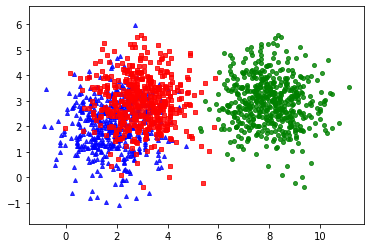

In [25]:
def kmeans_display(X,label):
    K = np.amax(label)+1
    X0=X[label==0,:]
    X1=X[label==1,:]
    X2=X[label==2,:]
    
    plt.plot(X0[:,0],X0[:,1],'b^',markersize=4,alpha=.8)
    plt.plot(X1[:,0],X1[:,1],'go',markersize=4,alpha=.8)
    plt.plot(X2[:,0],X1[:,1],'rs',markersize=4,alpha=.8)
    
    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [23]:
def kmeans_init_centers(X,k):
    return X[np.random.choice(X.shape[0],k,replace=False)]
def kmeans_assign_labels(X,centers):
    D = cdist(X, centers)
    return np.argmin(D,axis=1)
def kmeans_update_centers(X,labels,K):
    centers = np.zeros((K,X.shape[1]))
    for k in range(K):
        Xk = X[labels==k,:]
        centers[k,:] = np.mean(Xk,axis=0)
    return centers
def has_converged(centers,new_centers):
    return (set([tuple(a) for a in centers]) ==
        set([tuple(a) for a in new_centers]))

## Sử dụng thư viện

In [2]:
path = '25_Nguyen Van Linh_Ch3_K-means.csv'
df = pd.read_csv(path)
df.head(10)

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.shape

(200, 5)

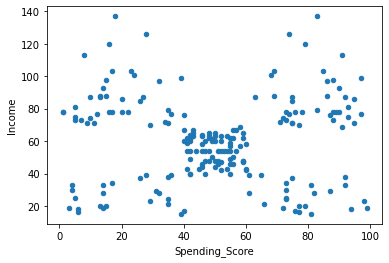

In [4]:
df.plot(kind='scatter', x='Spending_Score', y='Income')
plt.show()

In [5]:
df = df.drop(['CustomerID', 'Gender', 'Age'], axis=1)
df

,Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
df.corr()

,Income,Spending_Score
Income,1.000000,0.009903
Spending_Score,0.009903,1.000000


In [ ]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['x'], y=blobs['y'], s=150,
            c=blobs['cluster'].astype('category'), 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [6]:
sc = StandardScaler()
data_stand = sc.fit_transform(df)
data_stand

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [7]:
data_stand = pd.DataFrame(data_stand, columns=['Spending_Score', 'Income'])
data_stand

,Spending_Score,Income
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


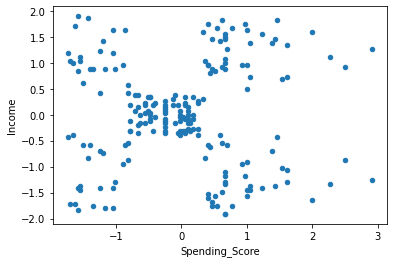

In [8]:
data_stand.plot(kind='scatter', x='Spending_Score', y='Income')
plt.show()

In [67]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K: 
    km=KMeans(n_clusters=k)
    km=km.fit(data_stand)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\fna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


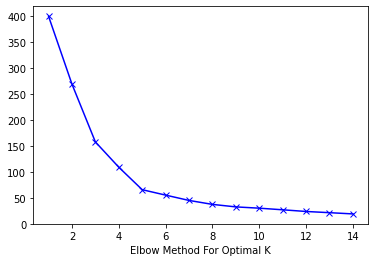

In [10]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.xlabel('Sum_of_squared_distances')
plt.xlabel('Elbow Method For Optimal K')
plt.show()

## K=5

In [11]:
km5 = KMeans(n_clusters = 5)
km5 = km5.fit(df)
print(km5.labels_)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 4 3 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 1 2 4 2 1 2 1 2 4 2 1 2 1 2 1 2 1 2 4 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [62]:
labels_1 = km5.labels_
labels_1 = pd.DataFrame(labels_1, columns=['Cluster'])
df_clustered_1 = pd.concat([df,labels_1], axis=1)

In [63]:
df_clustered_1.sort_values('Cluster', ascending=True)

,Income,Spending_Score,Cluster
41,38,92,0
23,25,73,0
29,29,87,0
21,24,73,0
39,37,75,0
...,...,...,...
126,71,35,4
92,60,49,4
93,60,40,4
85,54,46,4


In [64]:
df_clustered_1[df_clustered_1['Cluster']==0]

,Income,Spending_Score,Cluster
1,15,81,0
3,16,77,0
5,17,76,0
7,18,94,0
9,19,72,0
11,19,99,0
13,20,77,0
15,20,79,0
17,21,66,0
19,23,98,0


In [65]:
centroids_1 = km5.cluster_centers_
centroids_1 = pd.DataFrame(centroids_1, columns=['Centroid_SpendingScore', 'Centroid_Income'])
centroids_1

,Centroid_SpendingScore,Centroid_Income
0,25.727273,79.363636
1,88.200000,17.114286
2,86.538462,82.128205
3,26.304348,20.913043
4,55.296296,49.518519


<AxesSubplot:xlabel='Centroid_SpendingScore', ylabel='Centroid_Income'>

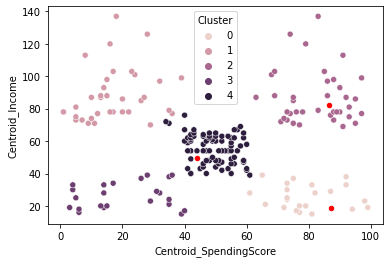

In [66]:
s1 = sns.scatterplot(data=df_clustered_1, x='Spending_Score', y='Income', hue='Cluster')
centroids.plot(ax=s1, kind='scatter', x='Centroid_SpendingScore', y='Centroid_Income', color='red')

## K=3

In [56]:
km3 = KMeans(n_clusters = 3)
km3 = km3.fit(df)
print(km3.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [57]:
labels_2 = km3.labels_
labels_2 = pd.DataFrame(labels, columns=['Cluster'])
df_clustered_2 = pd.concat([df,labels_2], axis=1)

In [58]:
df_clustered_2.sort_values('Cluster', ascending=True)

,Income,Spending_Score,Cluster
0,15,39,0
90,59,55,0
89,58,46,0
88,58,60,0
87,57,55,0
...,...,...,...
135,73,88,2
173,87,92,2
147,77,74,2
133,72,71,2


In [59]:
centroids_2 = km3.cluster_centers_
centroids_2 = pd.DataFrame(centroids_2, columns=['Centroid_SpendingScore', 'Centroid_Income'])
centroids_2

,Centroid_SpendingScore,Centroid_Income
0,44.154472,49.829268
1,87.000000,18.631579
2,86.538462,82.128205


<AxesSubplot:xlabel='Centroid_SpendingScore', ylabel='Centroid_Income'>

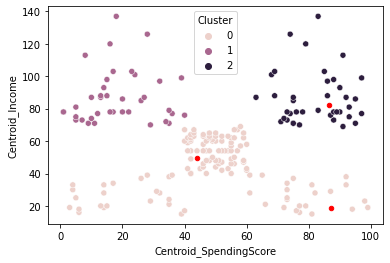

In [61]:
s2 = sns.scatterplot(data=df_clustered_2, x='Spending_Score', y='Income', hue='Cluster')
centroids_2.plot(ax=s2, kind='scatter', x='Centroid_SpendingScore', y='Centroid_Income', color='red')